# Introduction to Scikit-Learn (sklearn)

This notebook demonstrates some of the most useful funcitons of the beautiful Scikit-Learn library.

What we're going to cover:

0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together!

In [1]:
what_were_covering = [
    "0. An end-to-end Scikit-Learn workflow",
"1. Getting the data ready",
"2. Choose the right estimator/algorithm for our problems",
"3. Fit the model/algorithm and use it to make predictions on our data",
"4. Evaluating a model",
"5. Improve a model",
"6. Save and load a trained model",
"7. Putting it all together!",
]

In [2]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 0. An end-to-end Scikit-Learn workflow

In [3]:
# 1. Get the data ready
import pandas as pd
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [11]:
# Create X (features matrix/feature variables)
X = heart_disease.drop("target", axis=1)

# Create y (labels)
y = heart_disease["target"]

In [12]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [14]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
import sklearn
sklearn.show_versions()


System:
    python: 3.8.8 (tags/v3.8.8:024d805, Feb 19 2021, 13:18:16) [MSC v.1928 64 bit (AMD64)]
executable: C:\python36\python.exe
   machine: Windows-10-10.0.19041-SP0

Python dependencies:
      sklearn: 1.1.2
          pip: 22.0.4
   setuptools: 49.2.1
        numpy: 1.19.2
        scipy: 1.5.4
       Cython: None
       pandas: 1.1.1
   matplotlib: 3.3.2
       joblib: 1.1.0
threadpoolctl: 2.1.0

Built with OpenMP: True

threadpoolctl info:
       filepath: C:\python36\Lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
         prefix: libopenblas
       user_api: blas
   internal_api: openblas
        version: 0.3.9.dev
    num_threads: 4
threading_layer: pthreads

       filepath: C:\python36\Lib\site-packages\sklearn\.libs\vcomp140.dll
         prefix: vcomp
       user_api: openmp
   internal_api: openmp
        version: None
    num_threads: 4

       filepath: C:\python36\Lib\site-packages\scipy\.libs\libopenblas.3HBPCJB5BPQG

In [16]:
clf.fit(X_train, y_train);

In [17]:
# make a prediction
y_label = clf.predict(np.array([0, 2, 3, 4]))

ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [18]:
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0], dtype=int64)

In [19]:
y_test

290    0
222    0
60     1
52     1
178    0
      ..
200    0
135    1
293    0
31     1
86     1
Name: target, Length: 61, dtype: int64

In [20]:
# 4. Evaluate the model on the training data and test data
clf.score(X_train, y_train)

1.0

In [21]:
clf.score(X_test, y_test)

0.819672131147541

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78        27
           1       0.81      0.88      0.85        34

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61



In [23]:
# Predicted vs Actual Values ->
# [[True Positive, False Positive]
# [False Negative, True Negative]]
confusion_matrix(y_test, y_preds)

array([[20,  7],
       [ 4, 30]], dtype=int64)

In [24]:
accuracy_score(y_test, y_preds)

0.819672131147541

In [25]:
# 5. Improve a model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")

Trying model with 10 estimators...
Model accuracy on test set: 81.97%
Trying model with 20 estimators...
Model accuracy on test set: 80.33%
Trying model with 30 estimators...
Model accuracy on test set: 86.89%
Trying model with 40 estimators...
Model accuracy on test set: 80.33%
Trying model with 50 estimators...
Model accuracy on test set: 77.05%
Trying model with 60 estimators...
Model accuracy on test set: 80.33%
Trying model with 70 estimators...
Model accuracy on test set: 80.33%
Trying model with 80 estimators...
Model accuracy on test set: 83.61%
Trying model with 90 estimators...
Model accuracy on test set: 77.05%


In [26]:
# 6. Save a model and load it
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [27]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.7704918032786885

## 1. Getting our data ready to be used with machine learning

Three main things we have to do:

    1. Split the data into features and labels (usually `X` and `y`)
    2. Filling (also called imputing) or disregarding missing values
    3. Converting non-numerical values to numerical values (also called featued encoding)

In [28]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [29]:
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [30]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [31]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2)

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [33]:
X.shape[0] * 0.8

242.4

In [34]:
len(heart_disease)

303

- Clean Data -> Transform Data -> Reduce Data
- We need to convert information like categorical variables into number.
- The more data we have, the more CPU is needed. So we need to reduce/remove columns that are irrelevant/insignficant.

### 1.1 Make sure it's all numerical

In [35]:
car_sales = pd.read_csv("car-sales.csv")

In [36]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500


In [37]:
car_sales["Doors"].value_countsounts()

AttributeError: 'Series' object has no attribute 'value_countsounts'

In [39]:
len(car_sales)

10

In [40]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [41]:
# Split into X/y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# SPlit into training and test
X_train, X_test, y_train, y_test = train_test_split(
                                                    X,
                                                    y,
                                                    test_size=0.2)

In [42]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Toyota,White,150043,4
1,Honda,Red,87899,4
2,Toyota,Blue,32549,3
3,BMW,Black,11179,5
4,Nissan,White,213095,4


In [43]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

# A Regressor is predicting a number, it is similar to the RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Honda'

In [ ]:
X.head()

In [ ]:
# Let's try and convert our data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Doors is categorical because it's not continuous, it's **discrete**
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

In [44]:
pd.DataFrame(transformed_X)

NameError: name 'transformed_X' is not defined

In [45]:
# One Hot Encoder -> a process used to turn categories into numbers
# Now our data is now all numerical

In [46]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,0,0,1,0,0,0,0,1
1,4,0,1,0,0,0,0,0,1,0
2,3,0,0,0,1,0,1,0,0,0
3,5,1,0,0,0,1,0,0,0,0
4,4,0,0,1,0,0,0,0,0,1
5,4,0,0,0,1,0,0,1,0,0
6,4,0,1,0,0,0,1,0,0,0
7,4,0,1,0,0,0,1,0,0,0
8,4,0,0,0,1,0,0,0,0,1
9,4,0,0,1,0,0,0,0,0,1


In [47]:
# Let's refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, 
                                                    y, 
                                                    test_size=0.2)

model.fit(X_train, y_train)

NameError: name 'transformed_X' is not defined

In [48]:
model.score(X_test, y_test)
# Score is really low because I only have 10 data points in the .csv file.

ValueError: could not convert string to float: 'Nissan'

In [49]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Toyota,White,150043,4
1,Honda,Red,87899,4
2,Toyota,Blue,32549,3
3,BMW,Black,11179,5
4,Nissan,White,213095,4


### 1.2 What if there were missing values?

1. Fill them with some value (also known as imputation).
2. Remove the samples with missing data altogether.

In [50]:
# IMport car sales missing data
car_sales_missing = pd.read_csv("data/car-sales-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,4000.0
1,Honda,Red,87899.0,4.0,5000.0
2,Toyota,Blue,NaN,3.0,7000.0
3,BMW,Black,11179.0,5.0,22000.0
4,Nissan,White,213095.0,4.0,3500.0


In [51]:
car_sales_missing.isna().sum()

Make        1
Colour      1
Odometer    4
Doors       1
Price       2
dtype: int64

In [52]:
# Create X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [53]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Doors is categorical because it's not continuous, it's **discrete**
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

<10x16 sparse matrix of type '<class 'numpy.float64'>'
	with 40 stored elements in Compressed Sparse Row format>

In [54]:
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,4000.0
1,Honda,Red,87899.0,4.0,5000.0
2,Toyota,Blue,NaN,3.0,7000.0
3,BMW,Black,11179.0,5.0,22000.0
4,Nissan,White,213095.0,4.0,3500.0
5,Toyota,Green,NaN,4.0,4500.0
6,Honda,NaN,NaN,4.0,7500.0
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,9700.0


In [55]:
car_sales_missing["Doors"].value_counts()

4.0    7
5.0    1
3.0    1
Name: Doors, dtype: int64

#### Option 1: Fill missing data with Pandas

In [56]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the "Odometer (KM)" column
car_sales_missing["Odometer"].fillna(car_sales_missing["Odometer"].mean(), inplace=True)

# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace=True)

In [57]:
# Check our dataframe again
car_sales_missing.isna().sum()

Make        0
Colour      0
Odometer    0
Doors       0
Price       2
dtype: int64

In [58]:
# Remove rows with missing Price value
car_sales_missing.dropna(inplace=True)

In [59]:
car_sales_missing.isna().sum()

Make        0
Colour      0
Odometer    0
Doors       0
Price       0
dtype: int64

In [60]:
len(car_sales_missing)

8

In [61]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [62]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Doors is categorical because it's not continuous, it's **discrete**
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 1.50043000e+05, 4.00000000e+03],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 8.78990000e+04, 5.00000000e+03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 9.23026667e+04, 7.00000000e+03],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.000

Feature scaling: making all the numerical data is on the same scale. To fix this, there are 2 main types of feature scaling.

1. Normalization. This rescales all the numerical values to between 0 and 1, with the lowest value being close to 0 and the highest previous value being close to 1.

2. Standadization. This subtracts th emean value from all of the features, so the resulting features have 0 mean. It then scales the features to unit variance (by dividing the feature by the standard deviation).

- Feature scaling usually isn't required for your target variable.
- Feature scaling is usually not required with tree-based models (e.g. Random Forest) since they can handle varying features.

Takeaways:

- Split your data first (into train/test), always keep your training & test data separate.
- Fill/transform the training set and test sets separately (this goes for filling data with pandas as well)
- Don't use data from the future (test set) to fill data fom the past (training set).

### Option 2: Fill missing values with Scikit-Learn

In [63]:
car_sales_missing = pd.read_csv("data/car-sales-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,4000.0
1,Honda,Red,87899.0,4.0,5000.0
2,Toyota,Blue,NaN,3.0,7000.0
3,BMW,Black,11179.0,5.0,22000.0
4,Nissan,White,213095.0,4.0,3500.0


In [64]:
car_sales_missing.isna().sum()

Make        1
Colour      1
Odometer    4
Doors       1
Price       2
dtype: int64

In [65]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make        1
Colour      1
Odometer    3
Doors       0
Price       0
dtype: int64

In [66]:
# Split into X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [67]:
X.isna().sum()

Make        1
Colour      1
Odometer    3
Doors       0
dtype: int64

In [68]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer"]

imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, categorical_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features),
])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Toyota', 'White', 4.0, 4.0, 150043.0],
       ['Honda', 'Red', 4.0, 4.0, 87899.0],
       ['Toyota', 'Blue', 3.0, 3.0, 98763.2],
       ['BMW', 'Black', 5.0, 5.0, 11179.0],
       ['Nissan', 'White', 4.0, 4.0, 213095.0],
       ['Toyota', 'Green', 4.0, 4.0, 98763.2],
       ['Honda', 'missing', 4.0, 4.0, 98763.2],
       ['missing', 'White', 4.0, 4.0, 31600.0]], dtype=object)

In [69]:
car_sales_filled = pd.DataFrame(filled_X,
                                columns=["Make", "Colour", "Doors", "Doors", "Odometer"])
car_sales_filled.head()

,Make,Colour,Doors,Doors,Odometer
0,Toyota,White,4,4,150043
1,Honda,Red,4,4,87899
2,Toyota,Blue,3,3,98763.2
3,BMW,Black,5,5,11179
4,Nissan,White,4,4,213095


In [70]:
car_sales_filled.isna().sum()

Make        0
Colour      0
Doors       0
Doors       0
Odometer    0
dtype: int64

In [71]:
car_sales_filled.T.drop_duplicates()

,0,1,2,3,4,5,6,7
Make,Toyota,Honda,Toyota,BMW,Nissan,Toyota,Honda,missing
Colour,White,Red,Blue,Black,White,Green,missing,White
Doors,4,4,3,5,4,4,4,4
Odometer,150043,87899,98763.2,11179,213095,98763.2,98763.2,31600


In [72]:
car_sales_filled

,Make,Colour,Doors,Doors,Odometer
0,Toyota,White,4,4,150043
1,Honda,Red,4,4,87899
2,Toyota,Blue,3,3,98763.2
3,BMW,Black,5,5,11179
4,Nissan,White,4,4,213095
5,Toyota,Green,4,4,98763.2
6,Honda,missing,4,4,98763.2
7,missing,White,4,4,31600


In [73]:
car_sales_filled = car_sales_filled.loc[:,~car_sales_filled.columns.duplicated()].copy()

In [74]:
car_sales_filled

,Make,Colour,Doors,Odometer
0,Toyota,White,4,150043
1,Honda,Red,4,87899
2,Toyota,Blue,3,98763.2
3,BMW,Black,5,11179
4,Nissan,White,4,213095
5,Toyota,Green,4,98763.2
6,Honda,missing,4,98763.2
7,missing,White,4,31600


In [75]:
# Let's try and convert our data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Doors is categorical because it's not continuous, it's **discrete**
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<8x15 sparse matrix of type '<class 'numpy.float64'>'
	with 32 stored elements in Compressed Sparse Row format>

In [76]:
# Now we've got our data as numbers and filled (no missing values)
# Let's fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                   y,
                                                   test_size=0.2)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
model.score(X_test, y_test)

-116.89768

In [77]:
len(car_sales_filled), len(car_sales_missing)

(8, 8)

## 2. Choosing the right estimator/algorithm for your problem

Some things to note:

* Sklearn refers to machine learning models, algorithms as estimators.
* Classification problem - predicting a category (heart disease or not)
    * Sometimes you'll see `clf` (short for classifier) used as a classification estimator
* Regresion problem - predicting a number (selling price of a car)

If you're working a machine learning problem and looking to use Sklearn and not sure what model you should use, refer to the sklearn machine learning map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 Picking a machine learning model for a regression problem

Let's use the California housing dataset

In [78]:
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [79]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [80]:
housing_df["MedHouseVal"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [81]:
housing_df = housing_df.drop("MedHouseVal", axis=1)

In [82]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [83]:
housing_df["target"] = housing["target"]

In [84]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [85]:
# Import algorithm
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"] # median house price in $100, 000s

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

0.5758549611440127

What if `Ridge` didn't work or the score didn't fit our needs?

Well, we could always try a different model...

How about we try an ensemble model (an ensemble is a combination of smaller modelsto try and make better predictions than just a single model)?

Sklearn's ensemble models can be found here: https://scikit-learn.org/stable/modules/ensemble.html

In [86]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create random forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

0.8065734772187598

## 2.2 Picking a machine learning model for a classification problem

Let's go to the map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [87]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [88]:
len(heart_disease)

303

Consulting the map and it says to try `LinearSVC`

In [89]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate LinearSVC
clf = LinearSVC(max_iter=10000)
clf.fit(X_train, y_train)

# Evaluate the LinearSVC
clf.score(X_test, y_test)

0.8688524590163934

In [90]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [91]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Evaluate the LinearSVC
clf.score(X_test, y_test)

0.8524590163934426

Tidbit: 

    1. If you have structured data, use ensemble methods
    2. If you have unstructured data, use deep learning or transfer learning

In [92]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [93]:
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

## 3. Fit the model/algorithm on our data and use it to make predictions

### 3.1 Fitting the model to the data

* `X` = features, feature variables, data
* `y` = labels, targets, target variables, ground truth

In [94]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)

# Fit the model to the data
clf.fit(X_train, y_train)

# Evaluate the LinearSVC
clf.score(X_test, y_test)

0.8524590163934426

In [95]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [96]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [97]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

### 3.2 Make predictions using a machine learning model

2 ways to make predictions:
1. `predict()`
2. `predict_proba()`

In [98]:
# Use a trained model to make predictions
clf.predict(np.array([1, 7, 8, 3, 4])) # this doesn't work...

ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [99]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [100]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [101]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [102]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [103]:
clf.score(X_test, y_test)

0.8524590163934426

In [104]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

In [105]:
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

Make predictions with `predict_proba()`

In [106]:
# predict_proba() returns probabilities of a classification label

In [107]:
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [108]:
0.89+0.11, 0.49+0.51

(1.0, 1.0)

In [109]:
# Let's predict() on the same data...
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [110]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

`predict()` can also be used for regression models.

In [111]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [112]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model instance
model = RandomForestRegressor()

# Fit the model to the data
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

In [113]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [114]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [115]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.32659871732073664

In [116]:
len(y_preds)

4128

In [117]:
len(y_test)

4128

In [118]:
housing_df["target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

In [119]:
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

## 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/estimators:

1. Estimator's built-in `score()` method
2. The `scoring` parameter
3. Problem-specific metric functions
    
You can read more about these here: https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 Evaluating a model with the `score` method

In [120]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=1000)

# Fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [121]:
# The highest value for the .score() method is 1.0, the lowest is 0.0
clf.score(X_train, y_train)

1.0

In [122]:
# The score on the test data will usually be lower than on the training data
clf.score(X_test, y_test)

0.8688524590163934

Let's use the `score()` method on our regression problem...

In [123]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model instance
model = RandomForestRegressor(n_estimators=50)

# Fit the model to the data
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50)

In [124]:
model.score(X_train, y_train)

0.9724613502567376

In [125]:
# The default score() evaluation metric is r_squared for regression algorithms
# Highest = 1.0, lowest = 0.0
model.score(X_test, y_test)

0.8040661003828089

In [126]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [127]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [128]:
y_test.mean()

2.0550030959302323

### 4.2 Evaluating a model using the `scoring` parameter

In [129]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)

# Fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [130]:
clf.score(X_test, y_test)

0.8524590163934426

In [131]:
cross_val_score(clf, X, y, cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [132]:
cross_val_score(clf, X, y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [133]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [134]:
# Default scoring parameter of classifier = mean accuracy
clf.score()

TypeError: score() missing 2 required positional arguments: 'X' and 'y'

In [135]:
# Scoring parameter set to None by default
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [136]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [137]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y, cv=5)

In [138]:
np.mean(cross_val_score)

0.8248087431693989

In [139]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) * 100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


**Area under the receiver operating charactersitic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC Curve

ROC curves area a comparison of a model's true positive rate (tpr) versus a models's false positive rate (fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [140]:
# Create X_test... etc
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [141]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [142]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [143]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

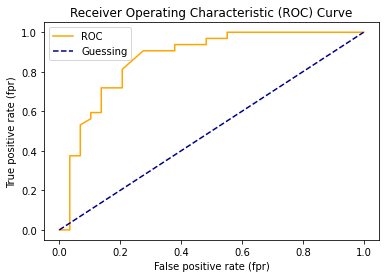

In [144]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (fpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [145]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

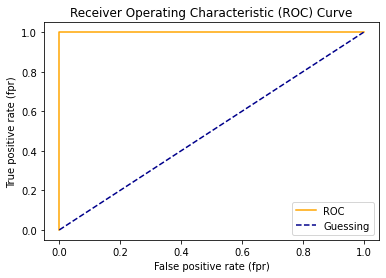

In [146]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [147]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

In a nutshell, what you should remember is:

* ROC curves and AUC metrics are evaluation metrics for binary classification models (a model which predicts one thing or another, such as heart disease or not).

* The ROC curve compares the true positive rate (tpr) versus the false positive rate (fpr) at different classification thresholds.

* The AUC metric tells you how well your model is at choosing between classes (for example, how well it is at deciding whether someone has heart disease or not). A perfect model will get an AUC score of 1.

**Confusion Matrix**

A confusion matrix is a quick way to compare the label a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused.

In [148]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [149]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
           y_preds,
           rownames=["Actual Labels"],
           colnames=["Predicted Labels"])
            

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


In [150]:
22 + 9 + 3 + 27

61

In [151]:
len(X_test)

61

In [152]:
# How to install a conda package into the current environment from a Jupyter notebook
# import sys
# !conda install --yes --predix {sys.prefix} seaborn

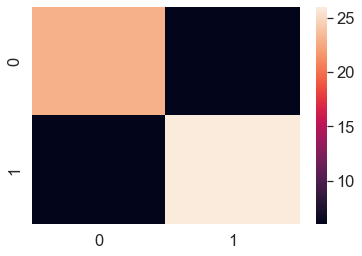

In [153]:
# Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot if using Seaborn
sns.heatmap(conf_mat);

In [154]:
!pip install scikit-learn==1.1.2
import sklearn
sklearn.__version__

Error processing line 1 of C:\Users\Andres\AppData\Roaming\Python\Python38\site-packages\protobuf-3.17.3-py3.8-nspkg.pth:

  Traceback (most recent call last):
    File "C:\python36\lib\site.py", line 169, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 553, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored
You should consider upgrading via the 'C:\python36\python.exe -m pip install --upgrade pip' command.


'1.1.2'

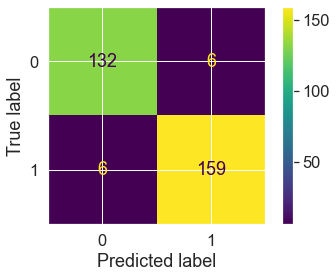

In [155]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y)

In [156]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=ypreds)

NameError: name 'ypreds' is not defined

**Classification Report**

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

**Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0

**Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.

**F1 Score** - A combination of precision and recall. A perfect model achieves an F-score of 1.0.

**Support** - The number of samples each metric was calculated on.

**Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.

**Macro avg** - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn't class imbalance into effort, so if you do have class imbalances, pay attention to this metric.

**Weighted avg** - Short for weighted average, the average weighted precisino, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many sampels there are in each class. This metric will favour the majority class (e.g. will give a high value when one class outperforms another due to having more samples)

In [ ]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts evey case as 0

pd.DataFrame(classification_report(disease_true, 
                                   disease_preds,
                                   output_dict=True))

To summarize classification metrics:

* **Accuracy** is agood measure to start with if all classes are balanced (e.g. same amount of sample which are labelled with 0 or 1).

* **Precision** and **recall** become more important when classes are imbalanced.

* If false positive predictions are worse than false negatives, aim for higher precision.

* If false negative predictions are worse than false positives, aim for higher recall.

* **F1-score** is a combination of precision and recall.

### 4.2.2 Regression model evaluation metrics

Model evaluation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

The ones we're going to cover are:

1. R^2 (pronounced r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean square error (MSE)

In [157]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor()

In [158]:
model.score(X_test, y_test)

0.8065734772187598

In [159]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [160]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [161]:
y_test.mean()

2.0550030959302323

In [162]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [163]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [164]:
r2_score(y_true=y_test,
        y_pred=y_test_mean)

0.0

In [165]:
r2_score(y_true=y_test,
        y_pred=y_test)

1.0

**Mean absolute error (MAE)**

MAE is the average of the absolute differences between predictions and actual values.

It gives you an idea of how wrong your models predictions are.

In [166]:
# MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.32659871732073664

In [167]:
y_preds

array([0.49384  , 0.75494  , 4.9285964, ..., 4.8363785, 0.71782  ,
       1.67901  ])

In [168]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [169]:
df = pd.DataFrame(data={"actual values": y_test,
                       "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head()

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240


In [170]:
# MAE using dormulas and differences
np.abs(df["differences"]).mean()

0.32659871732073664

**Mean Squared Error (MSE)**

MSE is the mean of the square of the errors between actual and predicted values.

In [171]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2534678520824551

In [172]:
df["squared_differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [173]:
# Calculate MSE by hand
squared = np.square(df["differences"])
squared.mean()

0.2534678520824551

In [174]:
df_large_error = df.copy()
df_large_error.iloc[0]["squared_differeces"] = 16

In [175]:
df_large_error.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [176]:
# Calculate MSE with large error
df_large_error["squared_differences"].mean()

0.2534678520824551

In [177]:
df_large_error.iloc[1:100] = 20
df_large_error

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,20.00000,20.000000,20.000000,20.000000
15663,20.00000,20.000000,20.000000,20.000000
20484,20.00000,20.000000,20.000000,20.000000
9814,20.00000,20.000000,20.000000,20.000000
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [178]:
df_large_error["squared_differences"].mean()

0.7295421709146245

Which regression metric should you use?

* **R^2** is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally the closer your R^2 value is to 1.0, the better the model. But it doesn't really tell you exactly how wrong your model is in terms of how far off each prediction is.
* **MAE** gives a better indication of how far off each of your model's predictions are on average.
* As for **MAE** or **MSE**, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are)
    * Pay more attention to MAE: when being \$10,000 off is **twice** as bad as being \$5,000 off.
    * Pay more attention to MSE: when being \$10,000 off is **more than twice** as bad as being \$5,000 off.

### 4.2.3 Finally using the `scoring` parameter

In [179]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

In [180]:
np.random.seed(42)

# Cross-validation accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None) # if scoring=None, estimator's default scoring evaluation metric is used (accuracy for classification models)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [181]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}")

The cross-validated accuracy is: 82.48


In [182]:
np.random.seed(42)

cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [183]:
# Precision
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [184]:
# Cross-validated precision
print(f"The cross-validated precision is: {np.mean(cv_precision)*100:.2f}")

The cross-validated precision is: 83.30


In [ ]:
# Recall
np.random.seed(42)
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall

In [ ]:
# Cross-validated recall
print(f"The cross-validated recall is: {np.mean(cv_recall)*100:.2f}")

Let's see the `scoring` parameter being used for a regression problem...

In [202]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

model = RandomForestRegressor(n_estimators=100)

In [203]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=3, scoring=None)
np.mean(cv_r2)

KeyboardInterrupt: 

In [ ]:
cv_r2

In [ ]:
# Mean absolute error
np.random.seed(42)
cv_mae = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
cv_mae
np.mean(cv_mae)

In [ ]:
# Mean squared error
cv_mse = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
cv_mse
np.mean(cv_mse)

## 4.3 Using different evaluation metrics as Sciki-Learn functions

The 3rd way to evaluate scikit-learn machine learning models/estimators is to use the `sklearn.metrics` module - https://scikit-learn.org/stable/modules/model_evaluation.html

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X and y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
clf = RandomForestClassifier()

# Fit model
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_test)

# Evaluate model using evaluation functions
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X and y
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
model = RandomForestRegressor()

# Fit model
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

# Evaluate model using evaluation functions
print("Regression metrics on the test set")
print(f"R2: {r2_score(y_test, y_preds)*100:.2f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_preds)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_preds)}")

## 5. Improving a model

First predictions = baseline predictions.
First model = baseline model.

From a data perspective:
* Could we collect more data? (generally, the more data, the better)
* Could we impove our data?

From a model perpsective:
* Is there a better model we could use?
* Could we improve the current model? 

Hyperparameters vs parameters
* Parameters = model finds these patterns in data
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns.

Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

In [ ]:
clf.get_params()

### 5.1 Tuning hyperparameters by hand

Analogy:
- Training set = Course Materials
- Validation set = Practice Exam
- Test set = Final Exam

Let's make 3 sets: training, validation, and test.

In [ ]:
clf.get_params()

We're going to try and adjust:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [ ]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs y_pred labels
    on a *classification* model.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                  "precision": round(precision, 2),
                  "recall": round(recall, 2),
                  "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score {f1:.2f}")
    
    return metric_dict

In [ ]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X & y

X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split the data into train, validation & test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

len(X_train), len(X_valid), len(X_test)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

In [ ]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)

# Make predictions with different hyperparameters
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)
clf_2_metrics

## 5.2 Hyperparameter tuning with RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
         "max_depth": [None, 5, 10, 20, 30],
         "max_features": ["auto", "sqrt"],
         "min_samples_split": [2, 4, 6],
         "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10, # number of models to try
                            cv=5,
                            verbose=2)

rs_clf.fit(X_train, y_train);

In [ ]:
rs_clf.best_params_

In [ ]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

### 5.3 Hyperparameter tuning with GridSearchCV

In [ ]:
grid

In [ ]:
6*5*2*3*3*5

In [ ]:
grid_2 = {"n_estimators": [100, 200, 500],
         "max_depth": [None],
         "max_features": ["auto", "sqrt"],
         "min_samples_split": [6],
         "min_samples_leaf": [1, 2]}

In [ ]:
3*1*2*1*2*5

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)
np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                        param_grid=grid_2,
                        cv=5,
                        verbose=2)

gs_clf.fit(X_train, y_train);

In [ ]:
gs_clf.best_params_

In [ ]:
gs_y_preds = gs_clf.predict(X_test)

# evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Let's compare our different models metrics.

In [ ]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                              "clf_2": clf_2_metrics,
                              "random search": rs_metrics,
                              "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10, 8));

**This is an experimental process done through hyperparameter tuning**

## 6. Saving and loading trained machine learning models

Two ways to save and load machine learning models:

1. With Python's `pickle` library
2. With the `joblib` library

**Pickle**

In [204]:
import pickle

# Save an existing model to file
pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl", "wb"))

NameError: name 'gs_clf' is not defined

In [ ]:
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl", "rb"))

In [ ]:
# Make some predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

**Joblib**

In [ ]:
from joblib import dump, load

# Save model to file
dump(gs_clf, filename="gs_random_forest_model_1.joblib")

In [ ]:
# Import a saved joblib model
loaded_joblib_model = load(filename="gs_random_forest_model_1.joblib")

In [ ]:
# Make and evaluate joblib predictions
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

## 7. Putting it all together!

In [219]:
data = pd.read_csv("data/car-sales-missing-data.csv")
data

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,4000.0
1,Honda,Red,87899.0,4.0,5000.0
2,Toyota,Blue,NaN,3.0,7000.0
3,BMW,Black,11179.0,5.0,22000.0
4,Nissan,White,213095.0,4.0,3500.0
5,Toyota,Green,NaN,4.0,4500.0
6,Honda,NaN,NaN,4.0,7500.0
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,9700.0


In [220]:
data.dtypes

Make         object
Colour       object
Odometer    float64
Doors       float64
Price       float64
dtype: object

In [221]:
data.isna().sum()

Make        1
Colour      1
Odometer    4
Doors       1
Price       2
dtype: int64

Steps we want to do (all in one cell):

1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

In [222]:
data

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,4000.0
1,Honda,Red,87899.0,4.0,5000.0
2,Toyota,Blue,NaN,3.0,7000.0
3,BMW,Black,11179.0,5.0,22000.0
4,Nissan,White,213095.0,4.0,3500.0
5,Toyota,Green,NaN,4.0,4500.0
6,Honda,NaN,NaN,4.0,7500.0
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,9700.0


In [231]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv("data/car-sales-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

numeric_features = ["Odometer"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps
preprocessor = ColumnTransformer(
        transformers=[
            ("cat", categorical_transformer, categorical_features),
            ("door", door_transformer, door_feature),
            ("num", numeric_transformer, numeric_features)
        ])

# Creating a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                       ("model", RandomForestRegressor())])

# Split data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

-110.98052

It's also possible to use `GridSearchCV` or `RandomizedSearchCV` with our `Pipeline`

In [233]:
# Use GridSearchCV with our regression Pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["auto"],
    "model__min_samples_split": [2, 4],
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_sampl

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.3s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.6s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.6s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.5s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strate

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['auto'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [234]:
gs_model.score(X_test, y_test)

-140.959248